## Imports

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input, RepeatVector, TimeDistributed
import vis_helper as v

2022-03-23 08:36:54.480062: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/openvino_2021/data_processing/dl_streamer/lib:/opt/intel/openvino_2021/data_processing/gstreamer/lib:/opt/intel/openvino_2021/opencv/lib:/opt/intel/openvino_2021/deployment_tools/ngraph/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/tbb/lib::/opt/intel/openvino_2021/deployment_tools/inference_engine/external/hddl/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/omp/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/gna/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/mkltiny_lnx/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/lib/intel64
2022-03-23 08:36:54.480083: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore ab

## Prepare dataset

In [2]:
X = np.arange(5, 301, 5)
X = X.reshape(20, 3, 1)

y = np.arange(20, 316, 5)
y = y.reshape(20, 3, 1)

print("X: ", X)
print("y: ", y)

X:  [[[  5]
  [ 10]
  [ 15]]

 [[ 20]
  [ 25]
  [ 30]]

 [[ 35]
  [ 40]
  [ 45]]

 [[ 50]
  [ 55]
  [ 60]]

 [[ 65]
  [ 70]
  [ 75]]

 [[ 80]
  [ 85]
  [ 90]]

 [[ 95]
  [100]
  [105]]

 [[110]
  [115]
  [120]]

 [[125]
  [130]
  [135]]

 [[140]
  [145]
  [150]]

 [[155]
  [160]
  [165]]

 [[170]
  [175]
  [180]]

 [[185]
  [190]
  [195]]

 [[200]
  [205]
  [210]]

 [[215]
  [220]
  [225]]

 [[230]
  [235]
  [240]]

 [[245]
  [250]
  [255]]

 [[260]
  [265]
  [270]]

 [[275]
  [280]
  [285]]

 [[290]
  [295]
  [300]]]
y:  [[[ 20]
  [ 25]
  [ 30]]

 [[ 35]
  [ 40]
  [ 45]]

 [[ 50]
  [ 55]
  [ 60]]

 [[ 65]
  [ 70]
  [ 75]]

 [[ 80]
  [ 85]
  [ 90]]

 [[ 95]
  [100]
  [105]]

 [[110]
  [115]
  [120]]

 [[125]
  [130]
  [135]]

 [[140]
  [145]
  [150]]

 [[155]
  [160]
  [165]]

 [[170]
  [175]
  [180]]

 [[185]
  [190]
  [195]]

 [[200]
  [205]
  [210]]

 [[215]
  [220]
  [225]]

 [[230]
  [235]
  [240]]

 [[245]
  [250]
  [255]]

 [[260]
  [265]
  [270]]

 [[275]
  [280]
  [285]]

 [[2

## Hyperparameters

In [3]:
EPOCHS = 2000
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

## Solution via Stacked LSTM

In [4]:
model = Sequential()
inputs = Input(shape=(3, 1))
model.add(inputs)
model.add(LSTM(100, activation='relu'))
model.add(RepeatVector(3))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))

2022-03-23 08:36:55.603033: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-23 08:36:55.603168: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/openvino_2021/data_processing/dl_streamer/lib:/opt/intel/openvino_2021/data_processing/gstreamer/lib:/opt/intel/openvino_2021/opencv/lib:/opt/intel/openvino_2021/deployment_tools/ngraph/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/tbb/lib::/opt/intel/openvino_2021/deployment_tools/inference_engine/external/hddl/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/omp/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/gna/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/mkltiny_lnx/lib:/opt/intel/openvino_2021/deployment

In [5]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 3, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 100)            80400     
_________________________________________________________________
time_distributed (TimeDistri (None, 3, 1)              101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

2022-03-23 08:36:55.714299: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-23 08:36:55.734048: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2803200000 Hz


## Training Plot

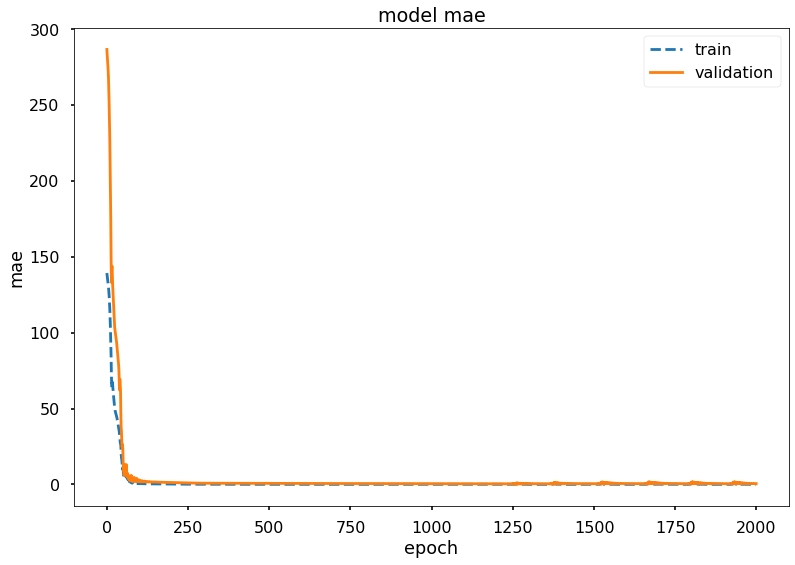

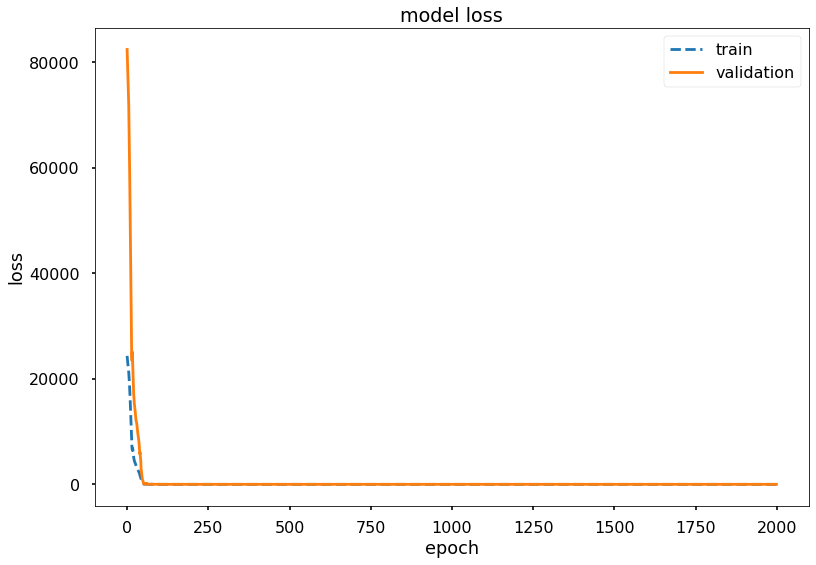

In [8]:
v.plot(history)

## Predictions

In [9]:
test_input = np.array([300, 305, 310])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input)
print("Actual: ", np.array([315, 320, 325]))
print("Predicted: ", test_output)

Actual:  [315 320 325]
Predicted:  [[[315.2204 ]
  [321.30988]
  [327.0364 ]]]


___

## Solution via Bidirectional LSTM

In [10]:
model = Sequential()
inputs = Input(shape=(3, 1))
model.add(inputs)
model.add(Bidirectional(LSTM(100, activation='relu')))
model.add(RepeatVector(3))
model.add(Bidirectional(LSTM(100, activation='relu', return_sequences=True)))
model.add(TimeDistributed(Dense(1)))

In [11]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 200)               81600     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 3, 200)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 3, 200)            240800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 3, 1)              201       
Total params: 322,601
Trainable params: 322,601
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

## Training Plot

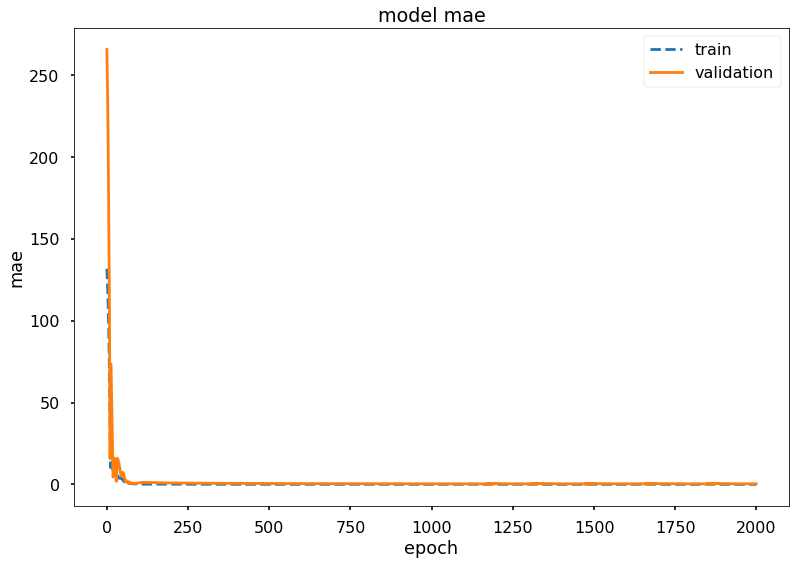

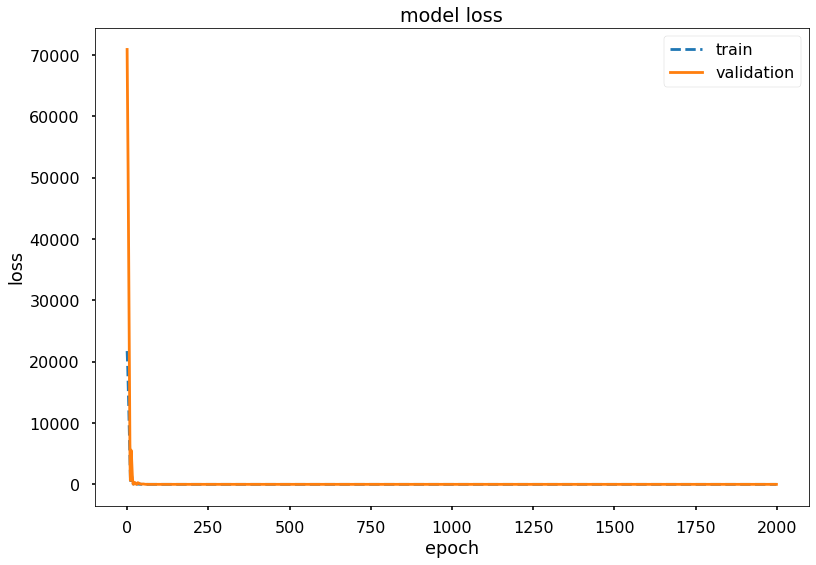

In [14]:
v.plot(history)

## Predictions

In [15]:
test_input = np.array([300, 305, 310])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input)
print("Actual: ", np.array([315, 320, 325]))
print("Predicted: ", test_output)

Actual:  [315 320 325]
Predicted:  [[[315.5076 ]
  [320.88327]
  [325.8782 ]]]
